In [20]:
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib as mpl
from scipy.interpolate import griddata 
import gsw.density as gsw_d
import gsw.conversions as gsw_c
import warnings
import os
import numpy as np
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
warnings.filterwarnings('ignore')
from myTools import myInfo
from myTrend import myfitting2d_sttcs,myRegress3d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib as mpl
# mpl.use('agg')

### ======================================================================

pthmd='J:/tmp_proc/Models/'
pthob='J:/tmp_proc/Obs/'

myEEMD_pth='C:/Users/shjo/OneDrive/mySO01/SCP_EEMD/OHC700_1993_2020_225E255E_65S45S/Figs/'

wpth='C:/Users/shjo/OneDrive/mySO/Composite/'

ModeN=5
vrnm='temp'
t_rng=['1993-01', '2017-12']
d_rng=[0,2000]
lat_rng=[-75,-30]; lon_rng=[230,250]

### =======================================================================
with open(myEEMD_pth+'EEMD_'+f'{ModeN:02d}'+'_mode.pickle', 'rb') as f:
    data = pickle.load(f)
Esig9317=data.mean(axis=1).loc[t_rng[0]:t_rng[-1]].values

### Preparation ============================================================
# wpth=wpth+vrnm+'_'+str(t_rng[0][:4])+'_'+str(t_rng[-1][:4])+'_'+\
#     str(lat_rng[0])+'S'+str(lat_rng[-1])+'S'+'_'+str(lon_rng[0])+\
#         'E'+str(lon_rng[-1])+'E'+'_'+f'{ModeN:02d}'+'mode'+'/'
# wpth=wpth.replace('-','')
# try :
#     os.mkdir(wpth)
# except:
#     pass
# loc=sys._getframe().f_code.co_filename
# myInfo(loc,wpth)

myMdls=[pthmd+i for i in os.listdir(pthmd) if i.endswith('.nc')]
myObsv=[pthob+i for i in os.listdir(pthob) if i.endswith('.nc')]

myDATA=myMdls+myObsv

if int(t_rng[0][:4])<1992:
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myARMOR3D')]
myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myISAS')]

In [21]:
Esig9317_std=(Esig9317-Esig9317.mean())/Esig9317.std()

In [22]:
posi_co=np.where(Esig9317_std>1/2)[0]
nega_co=np.where(Esig9317_std<-1/2)[0]

In [23]:
myN=20
temp_lim=[-2.,18]
salt_lim=[33.5,35]
mydepth=[-250, -500, -1000, -1500,-2000]
# mydepth=[-250, -500, -800]

mylevels2=[26.5,27,27.2,27.5,27.7,27.8]


!!! Open: J:/tmp_proc/Obs/myISHII_195501_202212_tsh.nc !!!
!!! linregress !!!


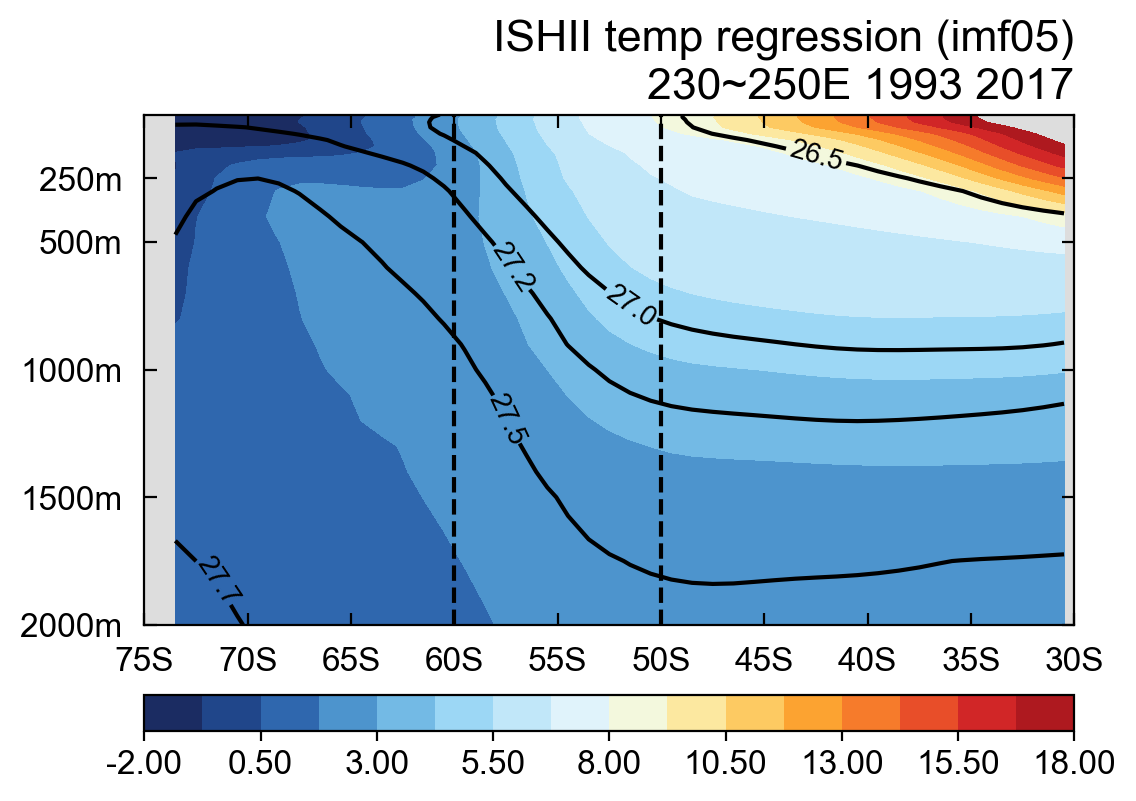

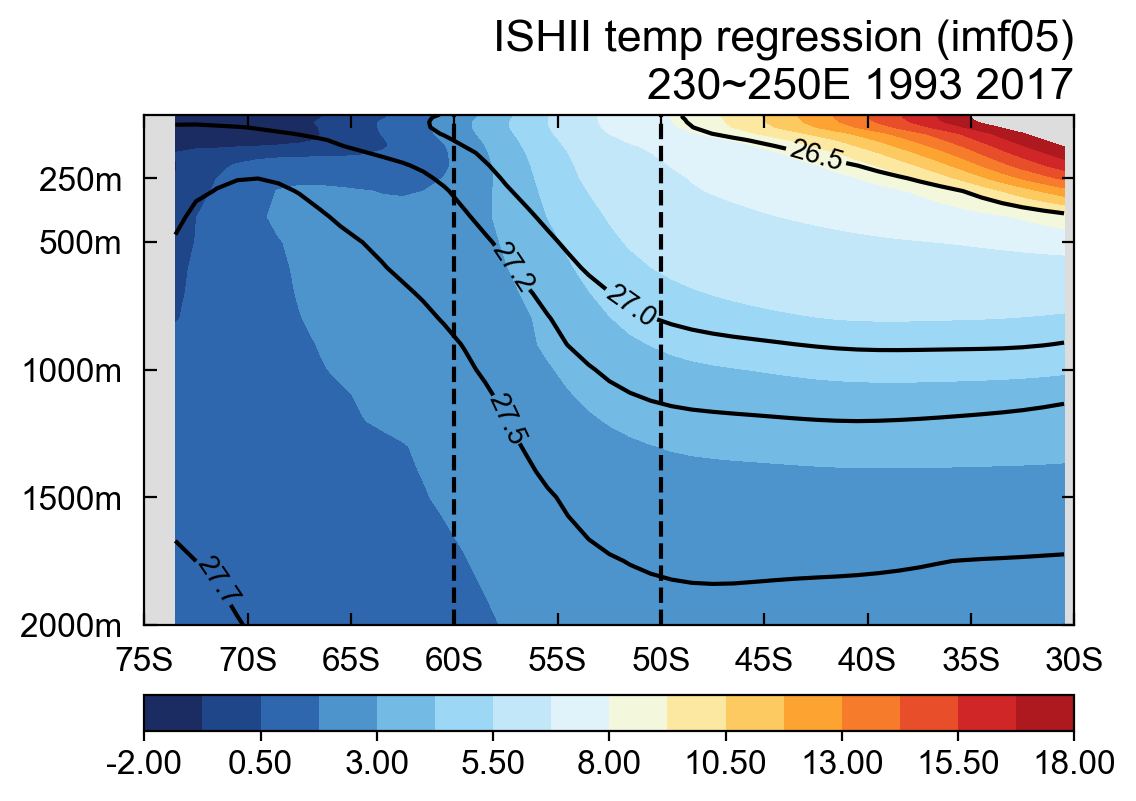

In [28]:
for i in [myDATA[-1]]:
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)

    mydata = tmp.loc[dict(lat=slice(lat_rng[0],lat_rng[-1]),lon=slice(lon_rng[0],lon_rng[-1])\
        ,time=slice(t_rng[0],t_rng[-1]),depth=slice(d_rng[0],d_rng[-1]))]
    mydata=mydata.where(mydata<10**30)
    mydata=mydata.mean(dim='lon',skipna=True)
    
    temp_=mydata['temp'].mean(dim='time').squeeze()
    salt_=mydata['salt'].mean(dim='time').squeeze()
    CT=gsw_c.CT_from_pt(salt_,temp_) #CT = gsw_CT_from_pt(SA,pt)
    rho = gsw_d.sigma0(salt_,CT)

    myvrnm=mydata[vrnm].values
    
    time,depthR,latR=mydata.time.values,mydata.depth.values,mydata.lat.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' '+vrnm+' regression (imf'+f'{ModeN:02d}'+')\n'+\
        str(lon_rng[0])+'~'+str(lon_rng[-1])+'E '+str(time[0])[:4]+' '+str(time[-1])[:4]
    dta_snm=i.split('/')[-1][2:-3].split('_')[0]+' '+vrnm+' regression imf'+f'{ModeN:02d}_'+\
        str(lat_rng[0])+'S'+str(lat_rng[-1])+'S'+' '+str(lon_rng[0])+'E'+str(lon_rng[-1])+'E_'+\
            str(time[0])[:4]+' '+str(time[-1])[:4]
    dta_snm=wpth+dta_snm.replace(' ','_').replace('salt','salinity').replace('-','')
    dta_nm=dta_nm.replace('salt','salinity').replace('-','')
    ### SST Coef =============================================================
    print('!!! linregress !!!')
    # plt.figure()
    # plt.scatter(range(300),mydata[:,30,20])
    # plt.show()

    posi=np.mean(myvrnm[posi_co],axis=0)
    nega=np.mean(myvrnm[nega_co],axis=0)


    ### Figure configs =======================================================
    # myCoefs.append(CoefD); myNm.append(dta_nm); myLat.append(latR)
    # raise
    
    myN=16
    mylim=[-2,18]
    CMAP,mylevel=myClrbr('myblc2',mylim,myN)
    CMAP_salt,mylevel_salt=myClrbr('salt',mylim,myN)
    CMAP_temp,mylevel_temp=myClrbr('balance',mylim,myN)

    latR_m,depthR_m=np.meshgrid(latR,depthR)

    mySetting={
        'figsize': '',
        'mylabel': '',
        'Label_size':12,
        'title_loc':'right',
        'fontParams':'Arial',
        'wpth':wpth}
    F=figmaster(mySetting)
    
    # F.Vertical_data_drift01(latR_m,-depthR_m,CoefD,CMAP_salt,mylevel_salt,dta_nm,dta_snm)
    F.Vertical_data_drift05(latR_m,-depthR_m,posi,rho, mydepth,CMAP,mylevel_salt,mylevels2,dta_nm,dta_snm)
    F.Vertical_data_drift05(latR_m,-depthR_m,nega,rho, mydepth,CMAP,mylevel_salt,mylevels2,dta_nm,dta_snm)



(122, 26, 45)